# Lab 8
Aim: Design a Type -1 Chebyshev IIR highpass filter

Filter order: 6
Critical frequency Wn: 0.2


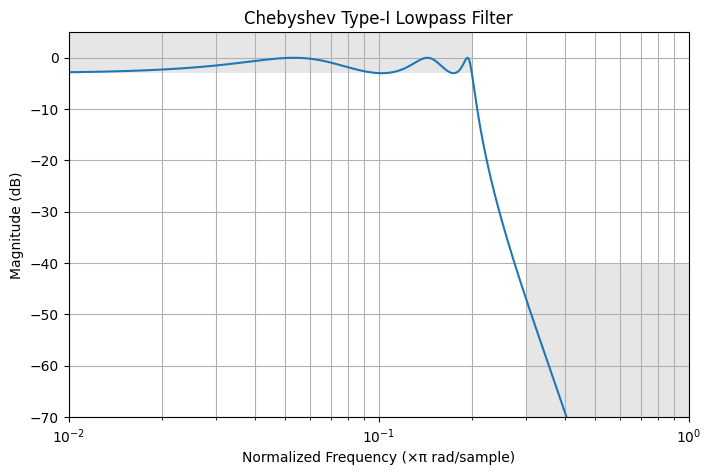

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ---- Filter specs ----
wp = 0.2       # Passband edge
ws = 0.3       # Stopband edge
gpass = 3      # Max ripple in passband (dB)
gstop = 40     # Min attenuation in stopband (dB)

# ---- Compute minimum Chebyshev-I filter order ----
N, Wn = signal.cheb1ord(wp, ws, gpass, gstop)

print("Filter order:", N)
print("Critical frequency Wn:", Wn)

# ---- Design Chebyshev Type-I lowpass filter ----
b, a = signal.cheby1(N, gpass, Wn, btype='low')

# ---- Frequency response ----
w, h = signal.freqz(b, a, worN=2048)

# ---- Plot ----
plt.figure(figsize=(8, 5))
plt.semilogx(w / np.pi, 20 * np.log10(np.abs(h)))
plt.title('Chebyshev Type-I Lowpass Filter')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both')

# Passband region
plt.fill([0.01, wp, wp, 0.01], [-gpass, -gpass, 5, 5], '0.9', lw=0)
# Stopband region
plt.fill([ws, ws, 2, 2], [-gstop, -99, -99, -gstop], '0.9', lw=0)

plt.ylim([-70, 5])
plt.xlim([0.01, 1])
plt.show()


Filter order: 6
Critical frequency Wn: 0.3


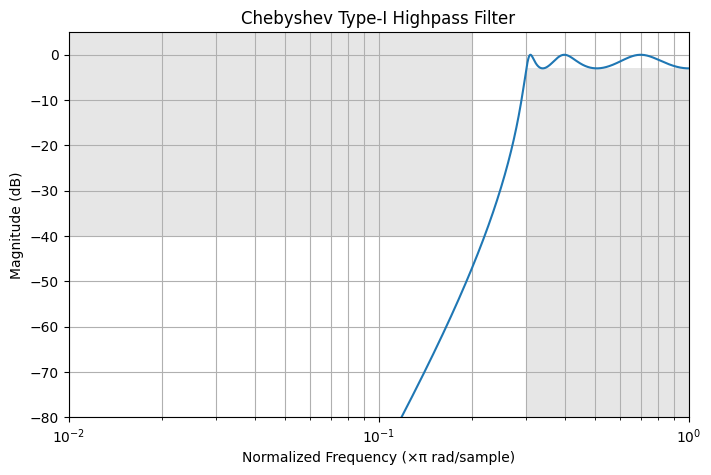

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ---- Filter specifications ----
wp = 0.3     # Passband edge (normalized 0–1, where 1 = Nyquist)
ws = 0.2     # Stopband edge
gpass = 3    # Maximum loss in the passband (dB)
gstop = 40   # Minimum attenuation in the stopband (dB)

# ---- Determine minimum filter order ----
N, Wn = signal.cheb1ord(wp, ws, gpass, gstop)

print("Filter order:", N)
print("Critical frequency Wn:", Wn)

# ---- Design the Chebyshev Type-I highpass filter ----
b, a = signal.cheby1(N, gpass, Wn, btype='high')

# ---- Compute frequency response ----
w, h = signal.freqz(b, a, worN=2048)

# ---- Plot frequency response ----
plt.figure(figsize=(8, 5))
plt.semilogx(w / np.pi, 20 * np.log10(np.abs(h)))
plt.title('Chebyshev Type-I Highpass Filter')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')

# Plot passband and stopband constraints
# Stopband region
plt.fill([0.01, ws, ws, 0.01], [-gstop, -gstop, 10, 10], '0.9', lw=0)
# Passband region
plt.fill([wp, wp, 2, 2], [-gpass, -99, -99, -gpass], '0.9', lw=0)

plt.ylim([-80, 5])
plt.xlim([0.01, 1])
plt.show()


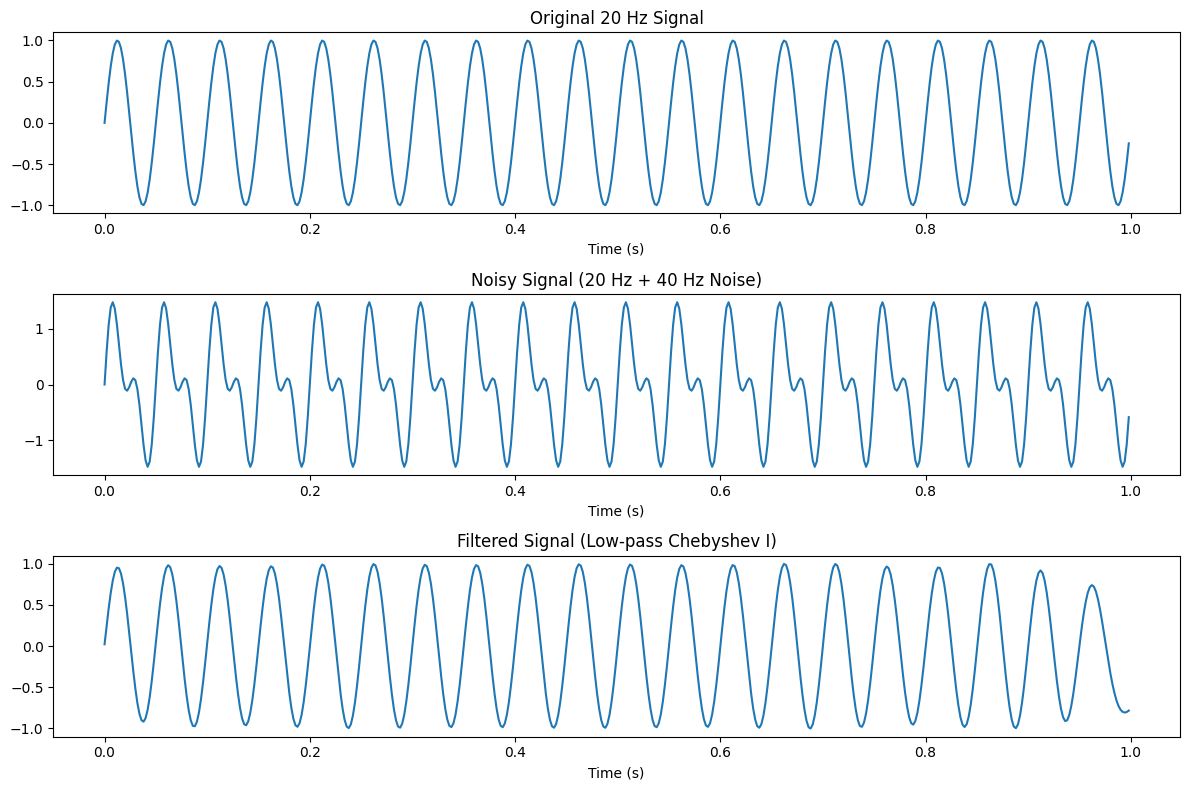

In [59]:
# Sampling settings
fs = 500                     # Hz
t = np.arange(0, 1.0, 1/fs)  # 1 second signal

# True signal: 20 Hz sine
freq = 20
sinWave = np.sin(2 * np.pi * freq * t)

# Noise: 40 Hz sine noise
noiseFreq = 40
noise = 0.7 * np.sin(2 * np.pi * noiseFreq * t)

# Noisy signal
noisySignal = sinWave + noise

# ------------- FILTER DESIGN -------------
# Normalized frequencies (0 to 1 where 1 = Nyquist = fs/2)
wp = 25 / (fs/2)     # Passband 25 Hz
ws = 35 / (fs/2)     # Stopband 35 Hz
gpass = 1            # dB ripple
gstop = 40           # dB attenuation

# Determine minimum filter order
N, Wn = signal.cheb1ord(wp, ws, gpass, gstop)

# Design low-pass Chebyshev-I filter
b, a = signal.cheby1(N, gpass, Wn, btype='low')

# Apply zero-phase filtering
filtered = signal.filtfilt(b, a, noisySignal)

# ------------- PLOTS -------------
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, sinWave)
plt.title("Original 20 Hz Signal")
plt.xlabel("Time (s)")

plt.subplot(3, 1, 2)
plt.plot(t, noisySignal)
plt.title("Noisy Signal (20 Hz + 40 Hz Noise)")
plt.xlabel("Time (s)")

plt.subplot(3, 1, 3)
plt.plot(t, filtered)
plt.title("Filtered Signal (Low-pass Chebyshev I)")
plt.xlabel("Time (s)")

plt.tight_layout()
plt.show()
